#  Hiring Problem
Imagine that you need to hire a new assistant. Every day an agency sends a new assistant for you to interview. If the assistant is better than your current assistant, then you hire them. You may assume that assistant quality is uniformly distributed between 0 and 1.

1. Write python code to simulate the Hire-Assistant problem. Your code should be properly commented on and you should show a couple of tests that validate your implementation.

2. What is the probability that exactly one assistant will be hired?

3. Plot a graph showing the average number of assistants hired on the y-axis, against the total number of applicants seen on the x-axis. Include both the theoretical estimate and an empirical estimate.

In [1]:
import numpy as np
import random
import math

def hire(n):
    #Quality of current assistant
    assistant = 0
    
    #How many assistants have been hired
    hired = 0
    
    #For every candidate
    for i in range(n):
        candidate = np.random.random_sample()
        #If candidate is better than assitant, hire
        if candidate > assistant:
            assistant = candidate
        
        #Increment hired
            hired += 1
    return hired

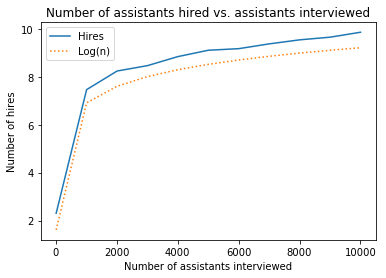

In [2]:
#QUESTION 2. 
#Since any candidate better than the current assistant will be hired, 
#the only way to interview all candidates but only hire one is if the first 
#interview is with the best assistant. 
#The probability of picking a specific candidate in the first interview is 1/n.

#List of hires
hires = []

#Number of runs for every value of n
i = 1000

#Number of assistants
ns = [n for n in range(5, 10010, 1000)]


for n in ns:
    temp = 0
    for _ in range(i):
        temp += hire(n)
    hires.append(temp/i)

    
#Plot results
import matplotlib.pyplot as plt

plt.plot(ns,hires, label = "Hires")
plt.plot(ns,[math.log(n) for n in ns], ":", label = "Log(n)")


plt.title("Number of assistants hired vs. assistants interviewed")
plt.xlabel("Number of assistants interviewed")
plt.ylabel("Number of hires")
plt.legend(loc=0)
plt.show()

## Taking into account hiring costs and objective
(Optional) Assume that an assistant is able to perform an amount of work each day that is equal to their “quality”. You have a total amount of work M that needs to be accomplished. Your costs are as follows:
X = daily salary for the assistant,
Y = fee to the employment agency,
Z = retrenchment fee for the old assistant.
Try to formulate an optimal stopping rule (ie. at what point should one stop requesting new potential hires from the agency?) Make any necessary assumptions to ensure the problem is well-formulated.

In [23]:
def project_cost(employee, project_duration, salary):
    return (project_duration/employee)*salary

def boundedly_rational_employer(project,interview_fee, salary, retrenchment): #Disregarding interview fee
    assistant = 0.000001
    expenses = 0
    days = 0
    
    #until project is finished
    while project > 0:
        
        #Interview random employee
        candidate = np.random.random_sample()
        
        #If you are expected to accomplish the project 
        #at a lower cost with candidate considering retrenchment fee, hire
        if project_cost(assistant, project, salary) > project_cost(candidate, project, salary)+retrenchment:
            
            assistant = candidate
            expenses += retrenchment
            
        project -= assistant
        expenses += salary + interview_fee
        days += 1
    return days, expenses

In [31]:
boundedly_rational_employer(100, 0.1, 0.5, 3.5)

(104, 72.90000000000002)

In [32]:
#Comparison
#In time to complete and days
def hire(project, interview_fee, salary, retrenchment):
    #Quality of current assistant
    assistant = 0
    expenses = 0
    days = 0
    
    #For every candidate
    while project > 0:
        
        #Interview random employee
        candidate = np.random.random_sample()
        
        #If candidate is better than assitant, hire
        if candidate > assistant:
            assistant = candidate
        
            #Increment expenses
            expenses += retrenchment
        
        days += 1
        expenses += salary + interview_fee
        project -= assistant
        
    return days, expenses

hire(100, 0.1, 0.5, 3.5)

(105, 87.49999999999986)

In [6]:
#List of hires
hires = []

#Number of runs for every value of n
i = 1000

#Number of assistants
ns = [n for n in range(5, 10010, 1000)]


for n in ns:
    temp1 = 0
    temp2 = 0
    for _ in range(i):
        temp1 += hire(100, 0.1, 0.5, 3.5)
        temp2 += 
    hires.append(temp/i)

    
#Plot results
import matplotlib.pyplot as plt

plt.plot(ns,hires, label = "Hires")


plt.title("Number of assistants hired vs. assistants interviewed")
plt.xlabel("Number of assistants interviewed")
plt.ylabel("Number of hires")
plt.legend(loc=0)
plt.show()

TypeError: hire() missing 3 required positional arguments: 'interview_fee', 'salary', and 'retrenchment'

In [29]:
def project_cost(employee, project_duration, salary):
    return project_duration/employee*salary

#Assumes knowledge of candidate distribution to calculate expected utility of interview
def rational_employer(project,interview_fee, salary, retrenchment): #Disregarding interview fee
    assistant = 0.000001
    expenses = 0
    days = 0
    
    #until project is finished
    while project > 0:
        
        
        #Since distribution is uniform, the expected improvement of a better candidate
        #is the average of all possible better candidates -> (1-assistant/2)
        average_benefit = project_cost(assistant, project, salary)-(project_cost((1-assistant/2), project, salary)+retrenchment)
        
        #(1-assistant) is probability of interviewing a candidate better than assistant
        probability = (1-assistant)
        
        #Is the expected utility, in terms of costs, positive for interview?
        if  average_benefit*probability > interview_fee:
        #Interview random employee
            candidate = np.random.random_sample()
        
            #If you are expected to accomplish the project 
            #at a lower cost with candidate considering retrenchment fee, hire
            if project_cost(assistant, project, salary) > project_cost(candidate, project, salary)+retrenchment:
                assistant = candidate
                expenses += retrenchment
            
        project -= assistant
        expenses += salary + interview_fee
        days += 1
    return days, expenses

rational_employer(100, 0.1, 0.5, 7)

(103, 75.8)

In [13]:
assistant = 0.1
salary = 0.5
retrenchment = 7
project = 100

average_benefit = project_cost(assistant, project, salary)-(project_cost((1-assistant/2), project, salary)+retrenchment)
        
#(1-assistant) is probability of interviewing a candidate better than assistant
probability = (1-assistant)
        
print(average_benefit*probability)

396.3315789473684


# Hat problem
An attendant at a party of N people receives everyone’s hats. However, he forgets whose hat belongs to whom. Rather than admit his mistake, he simply gives random hats back to everyone.

1. Write python code to simulate this problem. Your code should be properly commented on and you should show a couple of tests that validate your implementation.

2. What is the average number of correct hats returned? How does this scale as a function of N?

3. (Optional) As N tends to infinity, the number of correct hats returned tends towards a well-known statistical distribution. State the distribution with all its parameters. Draw lots of samples using your code. Does the empirical distribution match your theoretical prediction?

In [33]:
def hat_mess(n):
    right = 0
    people = [x for x in range(n)]
    hats = random.sample(people, n)
    for i in range(n):
        if hats[i] == people[i]:
            right += 1
    return right/n

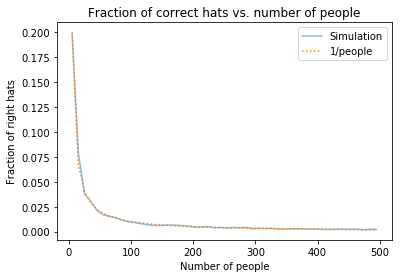

In [34]:
ns = [n for n in range(5, 500, 10)]
i = 100

success_rate = []
for n in ns:
    temp_success_rate = 0
    for _ in range(i):
        temp_success_rate += hat_mess(n)
    success_rate.append(temp_success_rate/i)
    
    
#Plot results
import matplotlib.pyplot as plt
plt.plot(ns,success_rate, alpha = 0.5, label = "Simulation")

distribution = [1/n for n in ns]
plt.plot(ns, distribution, ":", label = "1/people")
plt.title("Fraction of correct hats vs. number of people")
plt.xlabel("Number of people")
plt.ylabel("Fraction of right hats")
plt.legend(loc=0)
plt.show()

# Prisoner Light Bulb Problem

In [14]:
import numpy as np
import random

def prisoner_problem(n):
    
    prisoners = np.zeros(n)
    prisoners[0] = 1
    
    light = 0
    days = 0
    
    while True:
        days += 1
        prisoner_id = random.randint(0,99)
        
        if prisoner_id == 0:
            if 0 not in prisoners:
                break
            if light == 1:
                light = 0
        
        #If not chosen one,
        elif light == 0 and prisoners[prisoner_id] == 0:
            prisoners[prisoner_id] =1
            light = 1
    
    return days
    
    

In [16]:
average = 0
for i in range(1000):
    average+= prisoner_problem(100)
average/1000

10417.403

In [18]:
10417.403/365

28.5408301369863